In [2]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

In [3]:
train_raw = pd.read_csv("c:/users/lenovo/desktop/train.csv")
test_raw = pd.read_csv("c:/users/lenovo/desktop/test.csv")

train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1179 entries, 0 to 1178
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   RID        1179 non-null   int64  
 1   SITEID     1179 non-null   int64  
 2   VISCODE    1179 non-null   object 
 3   PTGENDER   1179 non-null   int64  
 4   PTDOB      1179 non-null   int64  
 5   MHPSYCH    1179 non-null   int64  
 6   MH2NEURL   1179 non-null   int64  
 7   MH4CARD    1179 non-null   int64  
 8   MH6HEPAT   1179 non-null   int64  
 9   MH8MUSCL   1179 non-null   int64  
 10  MH9ENDO    1179 non-null   int64  
 11  MH10GAST   1179 non-null   int64  
 12  MH12RENA   1179 non-null   int64  
 13  MH16SMOK   1179 non-null   int64  
 14  MH17MALI   1179 non-null   int64  
 15  APGEN1     1179 non-null   int64  
 16  APGEN2     1179 non-null   int64  
 17  MMSCORE    1179 non-null   int64  
 18  CDGLOBAL   1179 non-null   float64
 19  LIMMTOTAL  1179 non-null   int64  
 20  LDELTOTA

In [4]:
print(train_raw.head(4))

   RID  SITEID VISCODE  PTGENDER  PTDOB  MHPSYCH  MH2NEURL  MH4CARD  MH6HEPAT  \
0    2       1      bl         1   1941        0         1        0         0   
1    2       1     m18         1   1941        0         1        0         0   
2    3       1      bl         2   1939        1         0        0         0   
3    3       1     m18         2   1939        1         0        0         0   

   MH8MUSCL  ...  HMT7  HMT13  HMT40  HMT100  HMT102    RCT6    RCT11  \
0         0  ...   5.5    220   14.4    32.8    34.3  37.844   90.080   
1         0  ...   4.6    190   14.9    32.7    34.4  51.059   88.278   
2         0  ...   5.2    254   12.6    32.5    34.2  18.021  129.715   
3         0  ...   5.6    311   12.4    31.8    33.8  23.427   97.286   

     RCT20  RCT392            class  
0  173.993   0.916  HEALTHY CONTROL  
1  181.726   0.928  HEALTHY CONTROL  
2  251.322   0.792  HEALTHY CONTROL  
3  266.788   0.792  HEALTHY CONTROL  

[4 rows x 34 columns]


In [5]:
train_raw.describe()

,RID,SITEID,PTGENDER,PTDOB,MHPSYCH,MH2NEURL,MH4CARD,MH6HEPAT,MH8MUSCL,MH9ENDO,...,HMT3,HMT7,HMT13,HMT40,HMT100,HMT102,RCT6,RCT11,RCT20,RCT392
count,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,...,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000,1179.000000
mean,384.299406,1.343511,1.517388,1936.089907,0.097540,0.049194,0.338422,-0.026293,0.412214,0.067854,...,4.279338,5.617472,222.165394,13.585666,30.365564,33.037320,37.094372,90.028648,202.156489,0.761162
std,268.160339,0.475082,0.499910,7.019889,0.805216,0.621589,0.794703,0.574046,0.816669,0.686130,...,1.424981,2.267468,74.324672,3.126879,5.857057,6.122246,12.143868,21.216061,53.755827,0.769885
min,2.000000,1.000000,1.000000,1915.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000
25%,119.000000,1.000000,1.000000,1931.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.200000,4.800000,187.000000,13.200000,30.400000,33.600000,30.636000,82.874000,177.859000,0.724000
50%,365.000000,1.000000,2.000000,1937.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.480000,5.600000,221.000000,13.900000,31.300000,34.000000,36.042000,90.080000,204.924000,0.837000
75%,620.000000,2.000000,2.000000,1942.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,4.760000,6.600000,264.000000,14.800000,32.200000,34.500000,42.650000,97.286000,231.990000,0.995000
max,897.000000,2.000000,2.000000,1947.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,6.060000,22.100000,875.000000,18.100000,36.600000,36.000000,115.334000,234.208000,367.317000,2.093000


In [6]:
train_raw.drop(['RID'], axis=1, inplace=True)
test_raw.drop(['RID'], axis=1, inplace=True)

In [7]:
train_raw['class'].value_counts()

HEALTHY CONTROL    932
MCI or AD          247
Name: class, dtype: int64

In [15]:

# define categorical attributes for both training and test sets
from pandas.api.types import CategoricalDtype

column_of_target = ['class']
for col in train_raw.columns:
    if train_raw[col].nunique() < 7 and col not in column_of_target:
        train_raw[col] = train_raw[col].astype('category')
        
for col in test_raw.columns:
    if test_raw[col].nunique() < 10 :
        test_raw[col] = test_raw[col].astype('category')
        
test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 507 entries, 0 to 506
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   SITEID     507 non-null    category
 1   VISCODE    507 non-null    category
 2   PTGENDER   507 non-null    category
 3   PTDOB      507 non-null    int64   
 4   MHPSYCH    507 non-null    category
 5   MH2NEURL   507 non-null    category
 6   MH4CARD    507 non-null    category
 7   MH6HEPAT   507 non-null    category
 8   MH8MUSCL   507 non-null    category
 9   MH9ENDO    507 non-null    category
 10  MH10GAST   507 non-null    category
 11  MH12RENA   507 non-null    category
 12  MH16SMOK   507 non-null    category
 13  MH17MALI   507 non-null    category
 14  APGEN1     507 non-null    category
 15  APGEN2     507 non-null    category
 16  MMSCORE    507 non-null    int64   
 17  CDGLOBAL   507 non-null    category
 18  LIMMTOTAL  507 non-null    int64   
 19  LDELTOTAL  507 non-null    in

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
scaler = StandardScaler()

# extract categorical attributes from both training and test sets 
cattrain = train_raw.select_dtypes(include=['category']).copy()
cattest = test_raw.select_dtypes(include=['category']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = train_raw.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train_raw.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test_raw.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)


In [17]:
train_x = pd.concat([sc_traindf,traincat],axis=1)
train_y = train_raw['class']
train_x.shape

(1179, 32)

In [18]:
test_df = pd.concat([sc_testdf,testcat],axis=1)
test_df.shape

(507, 32)

<AxesSubplot:>

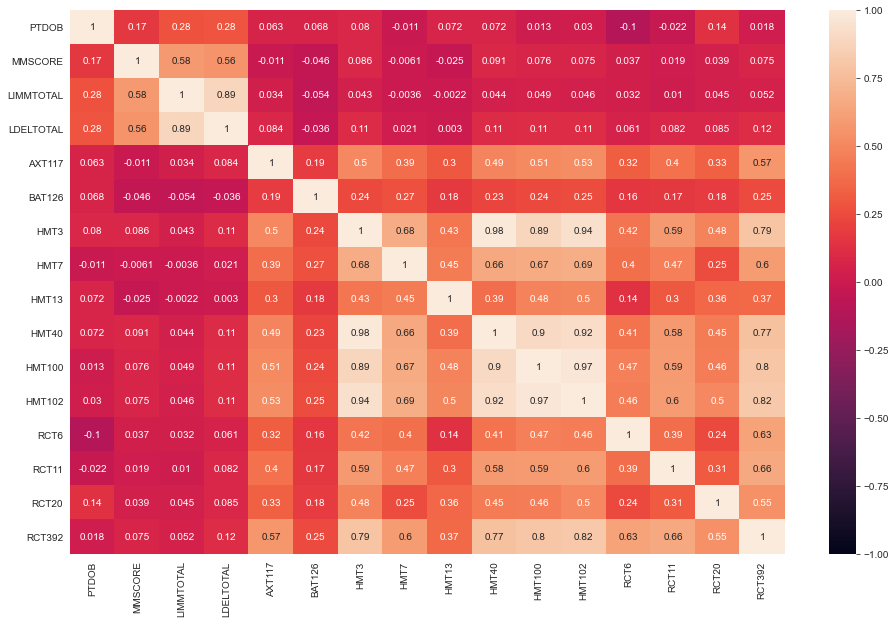

In [19]:
plt.figure(figsize=(16, 10))
sns.heatmap(train_raw.corr(),vmin=-1, vmax=1,annot=True)

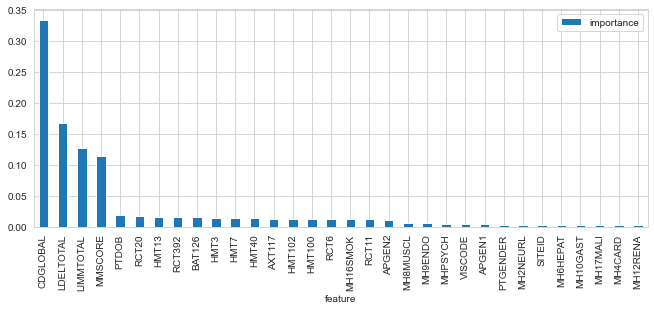

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier();

# fit random forest classifier on the training set
rfc.fit(train_x, train_y);
# extract important features
score = np.round(rfc.feature_importances_,7)
importances = pd.DataFrame({'feature':train_x.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [21]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 13 attributes
rfe = RFE(rfc, n_features_to_select=13)
rfe = rfe.fit(train_x, train_y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), train_x.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features

['PTDOB',
 'MMSCORE',
 'LIMMTOTAL',
 'LDELTOTAL',
 'BAT126',
 'HMT3',
 'HMT7',
 'HMT13',
 'HMT40',
 'RCT6',
 'RCT20',
 'RCT392',
 'CDGLOBAL']

<AxesSubplot:xlabel='class', ylabel='PTDOB'>

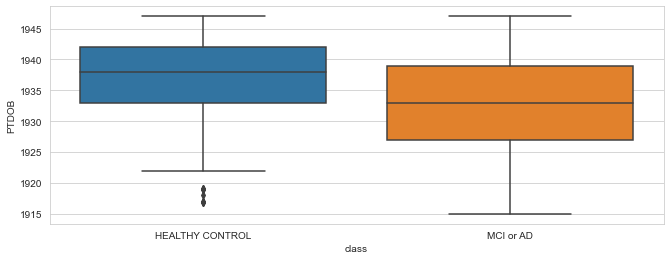

In [25]:
sns.set_style("whitegrid")
sns.boxplot(x='class',y =selected_features[0], data = train_raw)

In [132]:
PTDOB = list(train_raw[selected_features[9]])
PTDOB.sort()
for i in range(90,101,1):
    print(i,'percentile value is',np.percentile(PTDOB,i))

90 percentile value is 51.059
91 percentile value is 51.66
92 percentile value is 52.261
93 percentile value is 53.461999999999996
94 percentile value is 54.663999999999994
95 percentile value is 55.925099999999944
96 percentile value is 57.667
97 percentile value is 60.07
98 percentile value is 63.674
99 percentile value is 72.81700000000001
100 percentile value is 115.334


<Figure size 792x288 with 0 Axes>

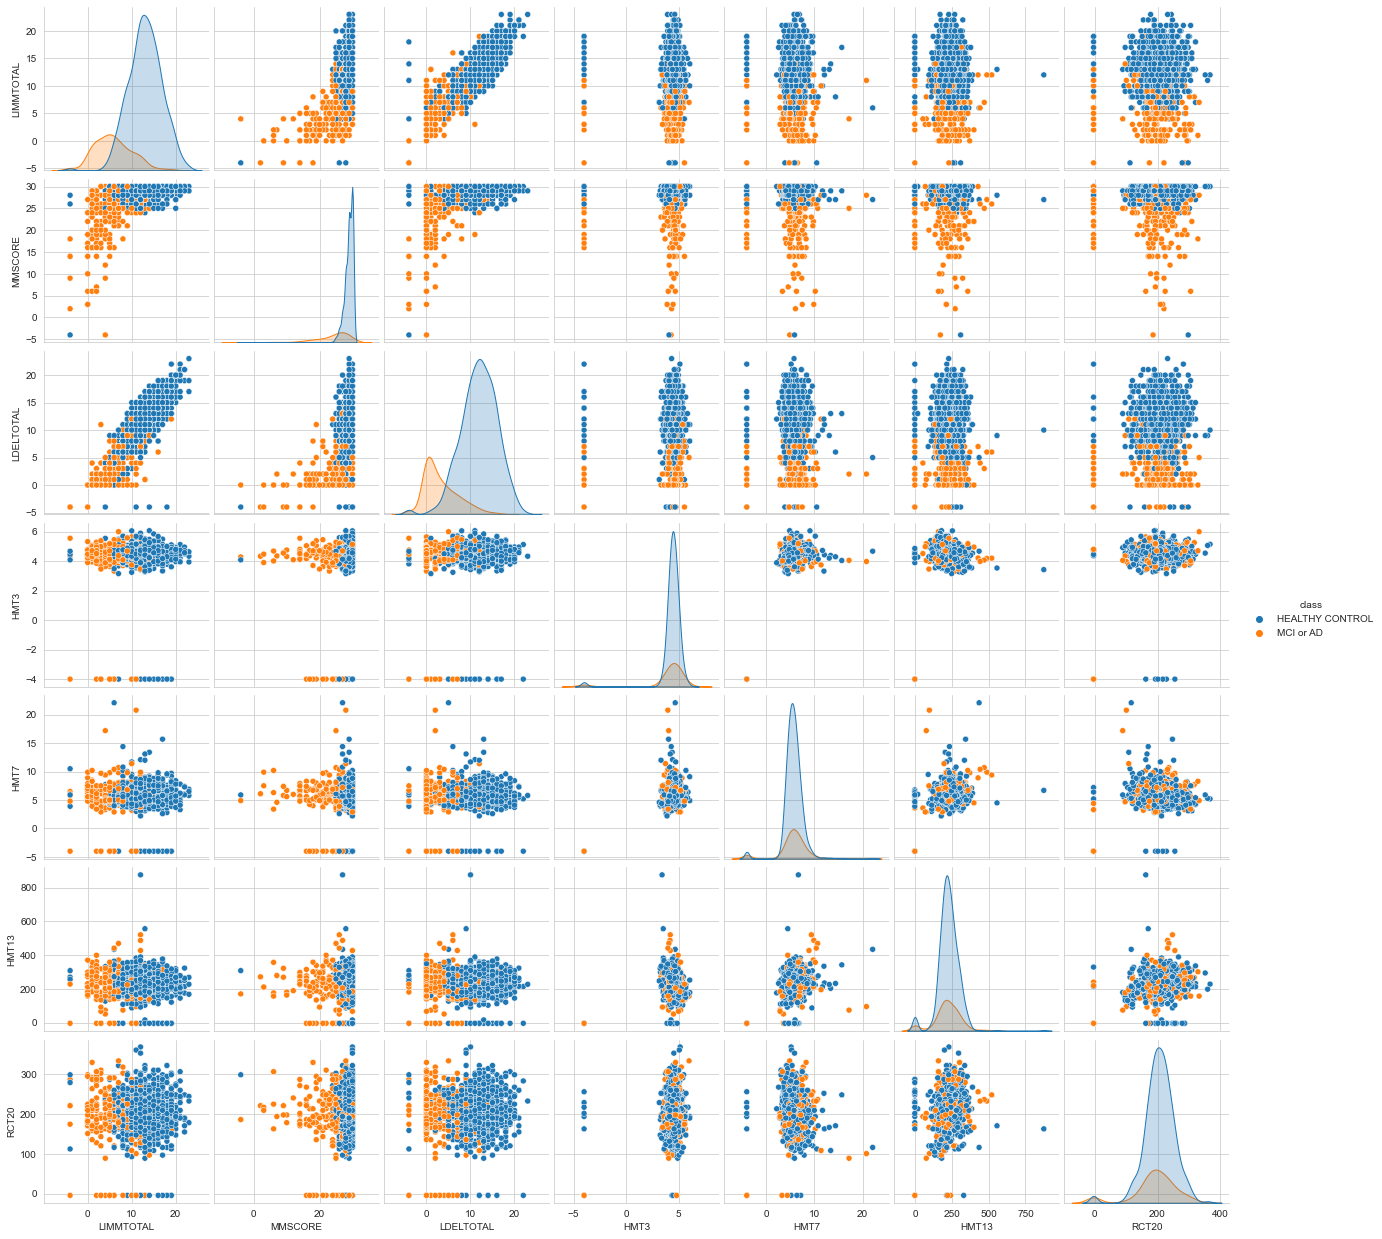

In [26]:
plt.figure()
sns.pairplot(train_raw[['LIMMTOTAL','MMSCORE','LDELTOTAL', 'HMT3', 'HMT7', 'HMT13','RCT20', 'class']], hue = "class",)
plt.show()

In [ ]:
,'AXT117', 'BAT126', 'HMT3', 'HMT7', 'HMT13', 'RCT6', 'RCT20'

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

In [28]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train,  Y_train)

SVC(degree=8, kernel='poly')

In [29]:
Y_pred = svclassifier.predict(X_test)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[275   3]
 [ 12  64]]
                 precision    recall  f1-score   support

HEALTHY CONTROL       0.96      0.99      0.97       278
      MCI or AD       0.96      0.84      0.90        76

       accuracy                           0.96       354
      macro avg       0.96      0.92      0.93       354
   weighted avg       0.96      0.96      0.96       354



In [31]:
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [32]:
Y_pred = svclassifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred))
print(classification_report(Y_test, Y_pred))

[[272   6]
 [ 29  47]]
                 precision    recall  f1-score   support

HEALTHY CONTROL       0.90      0.98      0.94       278
      MCI or AD       0.89      0.62      0.73        76

       accuracy                           0.90       354
      macro avg       0.90      0.80      0.83       354
   weighted avg       0.90      0.90      0.89       354



<AxesSubplot:>

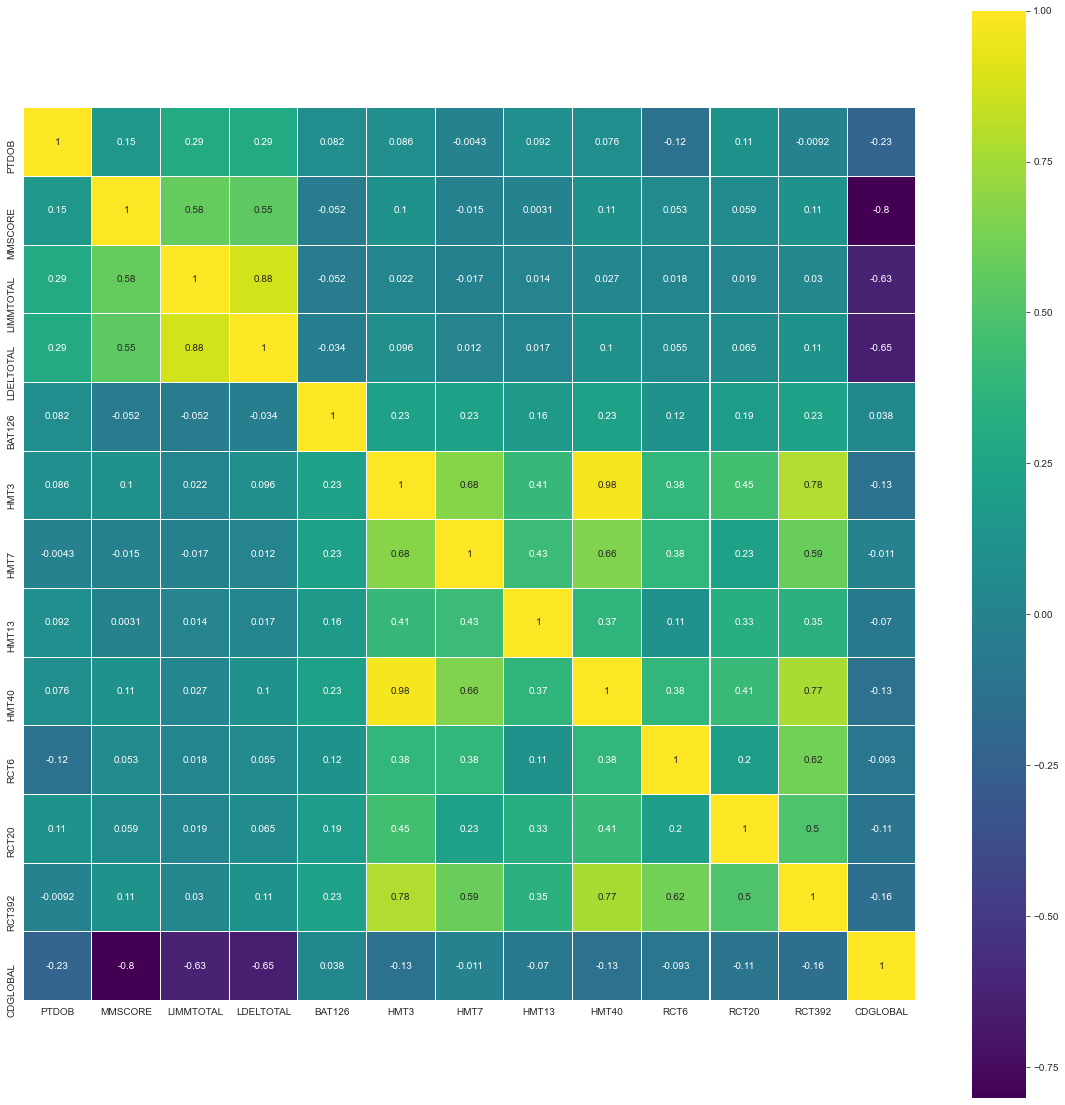

In [34]:
X_train = X_train[selected_features]
X_train.head()

X_test = X_test[selected_features]
X_test.head()

sample = X_train[:10000]

colormap = plt.cm.viridis
plt.figure(figsize=(20, 20))
sns.heatmap(sample.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, annot=True)

In [35]:
cols = X_train.columns.values

feature_df = pd.DataFrame({'features': cols,
                           'SVC' : svclassifier,
                           'SVM' : svclassifier
                          })
feature_df.head(10)

,features,SVC,SVM
0,PTDOB,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
1,MMSCORE,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
2,LIMMTOTAL,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
3,LDELTOTAL,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
4,BAT126,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
5,HMT3,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
6,HMT7,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
7,HMT13,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
8,HMT40,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')
9,RCT6,SVC(kernel='sigmoid'),SVC(kernel='sigmoid')


In [36]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, Y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)
            
# Train Decision Tree Model
DTC_Classifier = tree.DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [37]:
from sklearn import metrics

models = []
models.append(('NB classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== NB classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8752718189832501

Model Accuracy:
 0.8812121212121212

Confusion matrix:
 [[606  48]
 [ 50 121]]

Classification report:
                  precision    recall  f1-score   support

HEALTHY CONTROL       0.92      0.93      0.93       654
      MCI or AD       0.72      0.71      0.71       171

       accuracy                           0.88       825
      macro avg       0.82      0.82      0.82       825
   weighted avg       0.88      0.88      0.88       825



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.928474875110197

Model Accuracy:
 1.0

Confusion matrix:
 [[654   0]
 [  0 171]]

Classification report:
                  precision    recall  f1-score   support

HEALTHY CONTROL       1.00      1.00      1.00       654
      MCI or AD       1.00      1.00      1.00

In [38]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print() 


============================== NB classifier Model Test Results ==============================

Model Accuracy:
 0.8870056497175142

Confusion matrix:
 [[260  18]
 [ 22  54]]

Classification report:
                  precision    recall  f1-score   support

HEALTHY CONTROL       0.92      0.94      0.93       278
      MCI or AD       0.75      0.71      0.73        76

       accuracy                           0.89       354
      macro avg       0.84      0.82      0.83       354
   weighted avg       0.89      0.89      0.89       354



============================== Decision Tree Classifier Model Test Results ==============================

Model Accuracy:
 0.963276836158192

Confusion matrix:
 [[274   4]
 [  9  67]]

Classification report:
                  precision    recall  f1-score   support

HEALTHY CONTROL       0.97      0.99      0.98       278
      MCI or AD       0.94      0.88      0.91        76

       accuracy                           0.96       354
      macro 